In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import logsumexp, kl_div
from scipy import stats
import os

In [ ]:
x_max = 100 # (numbers between 1 and 100 are allowed)
x_eval = np.arange(1, 101)

all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]

In [ ]:
# Read data
url = 'https://raw.githubusercontent.com/allenhuang7008/Modeling-Priors-in-Bayesian-Inference-Insights-from-a-Number-Game-Experiment/main/survey_response.csv'
df = pd.read_csv(url)

# Graphs with the count & probabilities densities of numbers people chose

In [ ]:
counts = []
probs = []

for i in range(1, 4):
    count = df.iloc[:, i].str.split(', ').explode().astype(int).value_counts().sort_index()
    if len(count) < 100:
        count = count.reindex(index = range(1, x_max + 1), fill_value = 0)
    
    prob = count / len(df)
    
    counts.append(count)
    probs.append(prob)

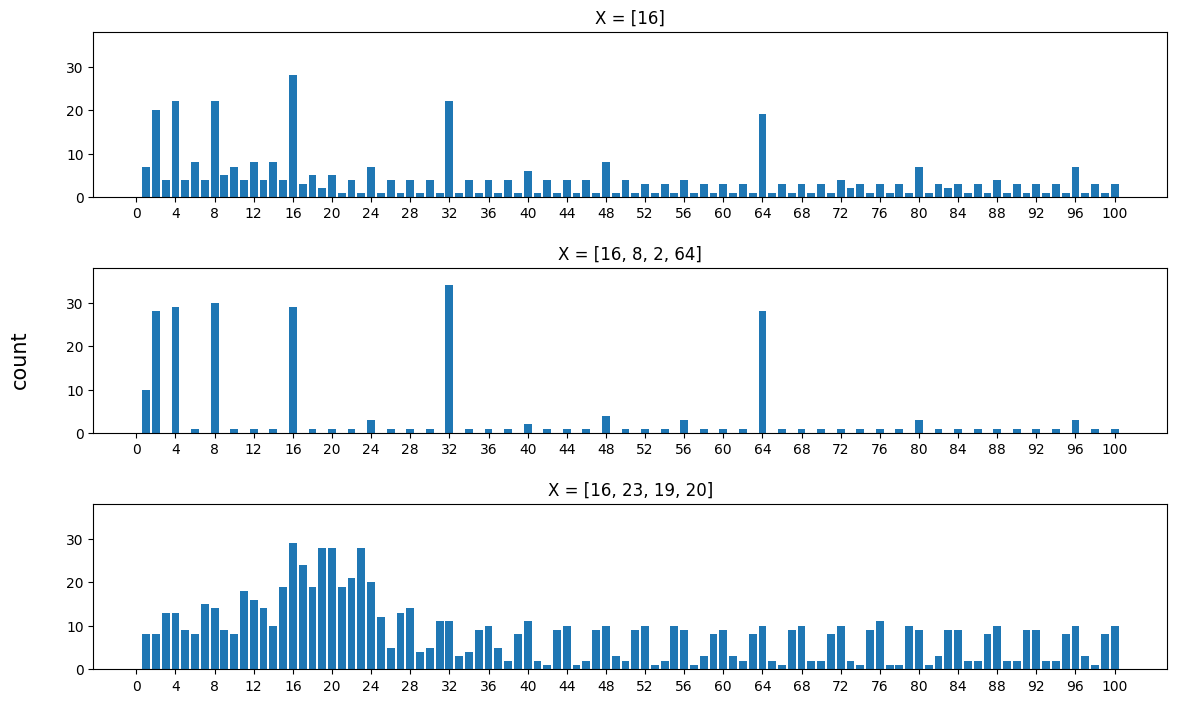

In [ ]:
COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'count', ha='center', va='center', rotation='vertical', fontsize = 15)

for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_count = counts[i]
    
    ax = axes[i]
    ax.bar(x_eval, curr_count)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((0,38))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')

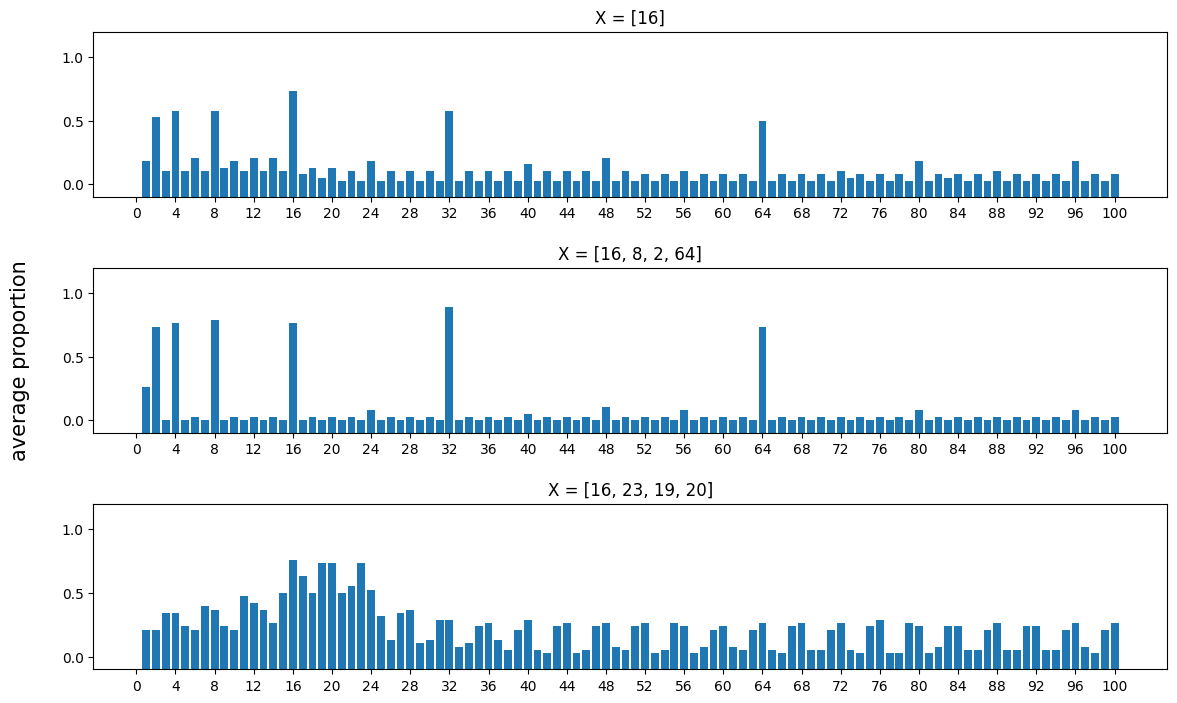

In [ ]:
all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]

COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'average proportion', ha='center', va='center', rotation='vertical', fontsize = 15)

mybottom = -0.1
human  = np.zeros((3,100))
for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_prob = probs[i]
    human[i] = curr_prob + 0.1
    
    ax = axes[i]
    ax.bar(x_eval, curr_prob - mybottom, bottom = mybottom)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((mybottom,1.2))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')


# Data Cleaning

## X = [16]

### Combined Hypotheses spaces

In [ ]:
priors_1 = df.iloc[:, 4] + ', ' + df.iloc[:, 10]
priors_1 = priors_1.str.split(', ').explode().str.strip()

In [ ]:
# Data cleaning
priors_1.replace(['exponents of 2', '2 raise to the next number', '4,32,16,64', 'Powers of two', 
                       'power of 2', 'Power of 2', '2^n', 'Exponential of 2', 'Exponential growth (2,4,8,16..)'], 
                      'Powers of 2', inplace = True)

priors_1.replace(['prime number'], 'Prime numbers', inplace = True)

priors_1.replace(['multiples of 16', 'All multiples of 16'], 'Multiples of 16', inplace = True)

priors_1.replace(['up to 16', 'Numbers <= 16', '15-25', 
                       'All numbers from 1-100', 'Every number up to and including 16'], 
                      'Consecutive numbers in an interval', inplace = True)

priors_1.replace(['Just the number itself', 'Only 16.thats the only info available.', 'squares of 4'], '16', inplace = True)

priors_1.replace(['Square of 2'], '4', inplace = True)

priors_1.replace(['64 -> Powers of 4'], 'Powers of 4', inplace = True)

priors_1.replace(['multiples of 8', 'Divisible by 8', 'Divisible by 8;  have many factors'], 'Multiples of 8', inplace = True)

priors_1.replace(['Yes. Factors', 'have many factors'], 'Composite numbers', inplace = True)

priors_1 = priors_1.str.split(' and ').explode()
priors_1.replace(['Even number', 'Even numbers', 'even numbers', 'Multiples of 2'], 'Even Numbers', inplace = True)
priors_1.replace(['numbers between 10-20'], 'Consecutive numbers in an interval', inplace = True)
priors_1 = priors_1.reset_index().drop_duplicates(subset=['index', 0]).iloc[:, 1]
priors_1.value_counts()

Powers of 2                           21
Even Numbers                          18
Multiples of 4                        12
Consecutive numbers in an interval     7
16                                     4
Multiples of 16                        4
Multiples of 8                         4
4                                      2
17                                     1
Only considered the obvious            1
Square numbers                         1
Odd Numbers                            1
Random                                 1
Prime numbers                          1
Powers of 4                            1
Factors of 16                          1
Composite numbers                      1
Squares                                1
Name: 0, dtype: int64

## X = [16, 8, 2, 64]

### Combined Hypotheses spaces

In [ ]:
priors_2 = df.iloc[:, 6] + ', ' + df.iloc[:, 13]
priors_2 = priors_2.str.split(', ').explode().str.strip()

In [ ]:
# Data cleaning
priors_2.replace(['Power of 2', '2 ^ i', 'powers of 2', 'exponents of 2', 'Powers of two', '2^n', 'Previous number multiplied by 2',
                       '2 raise to a number in ascending order.', 'Natural number powers of 2', 'Exponential of 2',
                       '1,2,4,8,16,32,64 -> Powers of 2', 'power of 2', 'Exponential growth (2,4,8,16..)', 
                       'each following number was previous number multiplied by 2'], 
                      'Powers of 2', inplace = True)

priors_2.replace(['prime numbers'], 'Prime numbers', inplace = True)

priors_2.replace(['multiples of 16', 'All multiples of 16'], 'Multiples of 16', inplace = True)

priors_2.replace(['up to 16', 'Numbers <= 16', '15-25', 
                       'All numbers from 1-100', 'Every number up to and including 16'], 
                      'Consecutive numbers in an interval', inplace = True)

priors_2.replace(['squares of 2'], '4', inplace = True)

priors_2.replace(['64 -> Powers of 4'], 'Powers of 4', inplace = True)

priors_2.replace(['multiples of 8'], 'Multiples of 8', inplace = True)

priors_2.replace(['Yes. Factors', 'have many factors'], 'Composite numbers', inplace = True)

priors_2 = priors_2.str.split(' and ').explode()
priors_2.replace(['Even number', 'Even numbers', 'even numbers', 'Multiples of 2'], 'Even Numbers', inplace = True)
priors_2.replace(['numbers between 10-20'], 'Consecutive numbers in an interval', inplace = True)
priors_2 = priors_2.reset_index().drop_duplicates(subset=['index', 0]).iloc[:, 1]
priors_2.value_counts()

Powers of 2                           35
Even Numbers                          11
Multiples of 4                         3
Multiples of 8                         2
-                                      1
4                                      1
32                                     1
Factors                                1
multiples of 16                        1
NA                                     1
Prime numbers                          1
Consecutive numbers in an interval     1
The same as the known info             1
Only the obvious                       1
Name: 0, dtype: int64

## X = [16, 23, 19, 20]

### Combined Hypotheses spaces

In [ ]:
priors_3 = df.iloc[:, 8] + ', ' + df.iloc[:, 16]
priors_3 = priors_3.str.split(', ').explode().str.strip()

In [ ]:
# Data cleaning
priors_3.replace(['exponents of 2', '2 raise to the next number', '4,32,16,64', 'Powers of two', 
                       'power of 2', 'Power of 2', '2^n', 'Exponential of 2', 'Exponential growth (2,4,8,16..)', '1,2,4,8,16,32,64 -> Powers of 2', '2 raise to a number in ascending order.'], 
                      'Powers of 2', inplace = True)

priors_3.replace(['prime number', 'primes'], 'Prime numbers', inplace = True)

priors_3.replace(['multiples of 16', 'All multiples of 16'], 'Multiples of 16', inplace = True)

priors_3.replace(['up to 16', 'Numbers <= 16', '15-25', 
                       'All numbers from 1-100', 'Every number up to and including 16', 'squares of 4', 'Just the number itself', 'Square of 2', '16'], 
                      'Consecutive numbers in an interval', inplace = True)

priors_3.replace(['64 -> Powers of 4'], 'Powers of 4', inplace = True)

priors_3.replace(['multiples of 8'], 'Multiples of 8', inplace = True)

priors_3.replace(['Yes. Factors', 'have many factors'], 'Composite numbers', inplace = True)

priors_3.replace(['Even number', 'Even numbers', 'even numbers', 'Multiples of 2'], 'Even Numbers', inplace = True)
priors_3.replace(['numbers between 10-20'], 'Consecutive numbers in an interval', inplace = True)
priors_3.replace(['Under 50', 'Numbers less than 30', 'Anything under 30', 'Numbers up to 23',
                       'Greater than equal to 15', 'less than equal to 25', 'Just numbers between 10 and 30',
                       'Numbers between 16-25', 'Range from 16 to 23', 'Every number up to 25',
                       'All numbers', 'All number from 1-100', 'Interval bw 15,23', '23>=x>=16',
                       'Numbers below 25', '[10,25] -> a set of numbers', '15-25', 'numbers between 16 and 25',
                       '16-23', 'interval', 'Numbers less than a range', 'All'],
                      'Consecutive numbers in an interval', inplace = True)

priors_3.replace('odd', 'Odd Numbers', inplace = True)

priors_3.replace(['divisible by 4'], 'Multiples of 4', inplace = True)

priors_3.replace(['Na', 'None', 'None.'], 'No pattern', inplace = True)
priors_3.replace(['4x', '4x-1', 'Multiples of 4 minus 1'], '4n and 4n-1', inplace = True)
priors_3.replace(['Add/ subtract 3', '+3  (n1+3=n3)', '-3(n2-3=n4)', 'n+3'], 'n +/- 3', inplace = True)
priors_3 = priors_3.reset_index().drop_duplicates(subset=['index', 0]).iloc[:, 1]
priors_3.value_counts()

Consecutive numbers in an interval                                28
Prime numbers                                                      8
Multiples of 4                                                     5
No pattern                                                         4
n +/- 3                                                            2
Numbers ending in 3                                                2
4n and 4n-1                                                        2
Odd Numbers                                                        2
Multiples of four and prime numbers                                1
two numbers are selected after every two numbers                   1
Numbers ending in 6                                                1
Numbers ending in 1                                                1
Multiples of 5                                                     1
Multiples of 3                                                     1
Powers of 3                       

# Graphs with Priors count

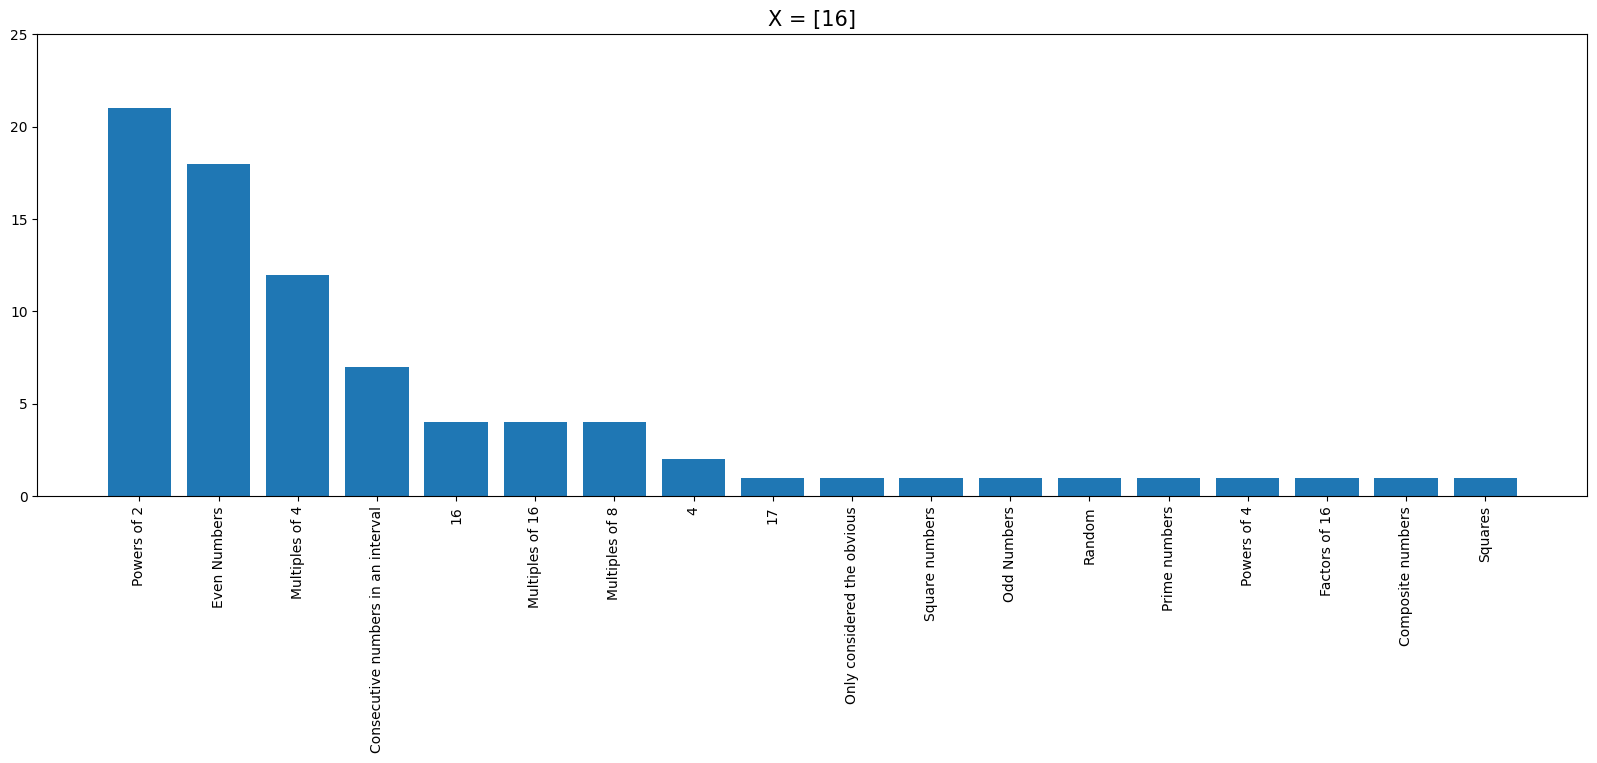

In [ ]:
p1 = priors_1.value_counts()
plt.figure(figsize = (20,6))
plt.bar(p1.index, p1)
plt.xticks(rotation = 90)
plt.ylim((0,25))
plt.title('X = [16]', fontsize = 15)
plt.show()

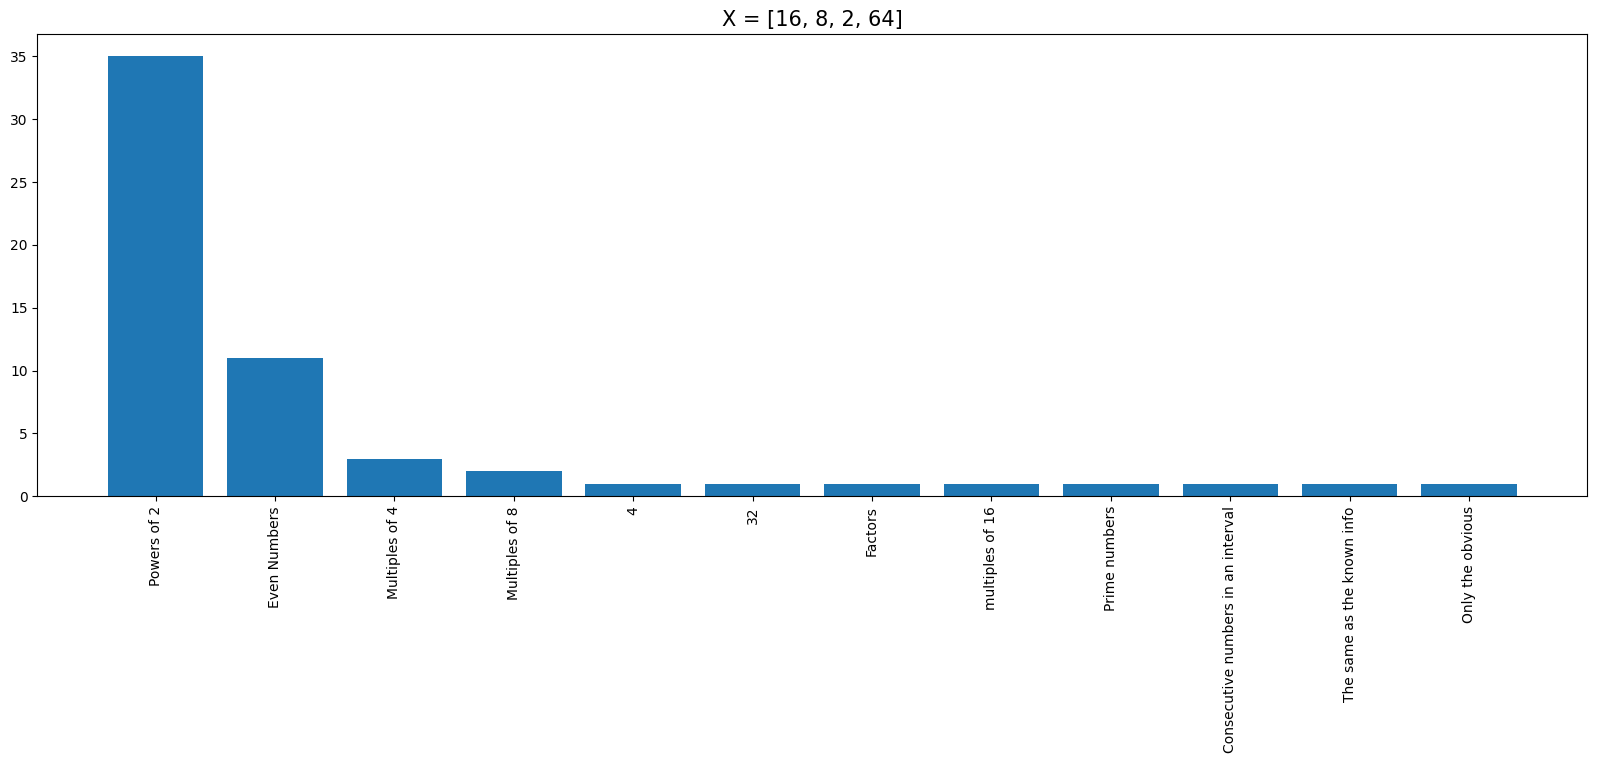

In [ ]:
p2 = priors_2.value_counts().drop(['-', 'NA'])
plt.figure(figsize = (20,6))
plt.bar(p2.index, p2)
plt.xticks(rotation = 90)
plt.title('X = [16, 8, 2, 64]', fontsize = 15)
plt.show()

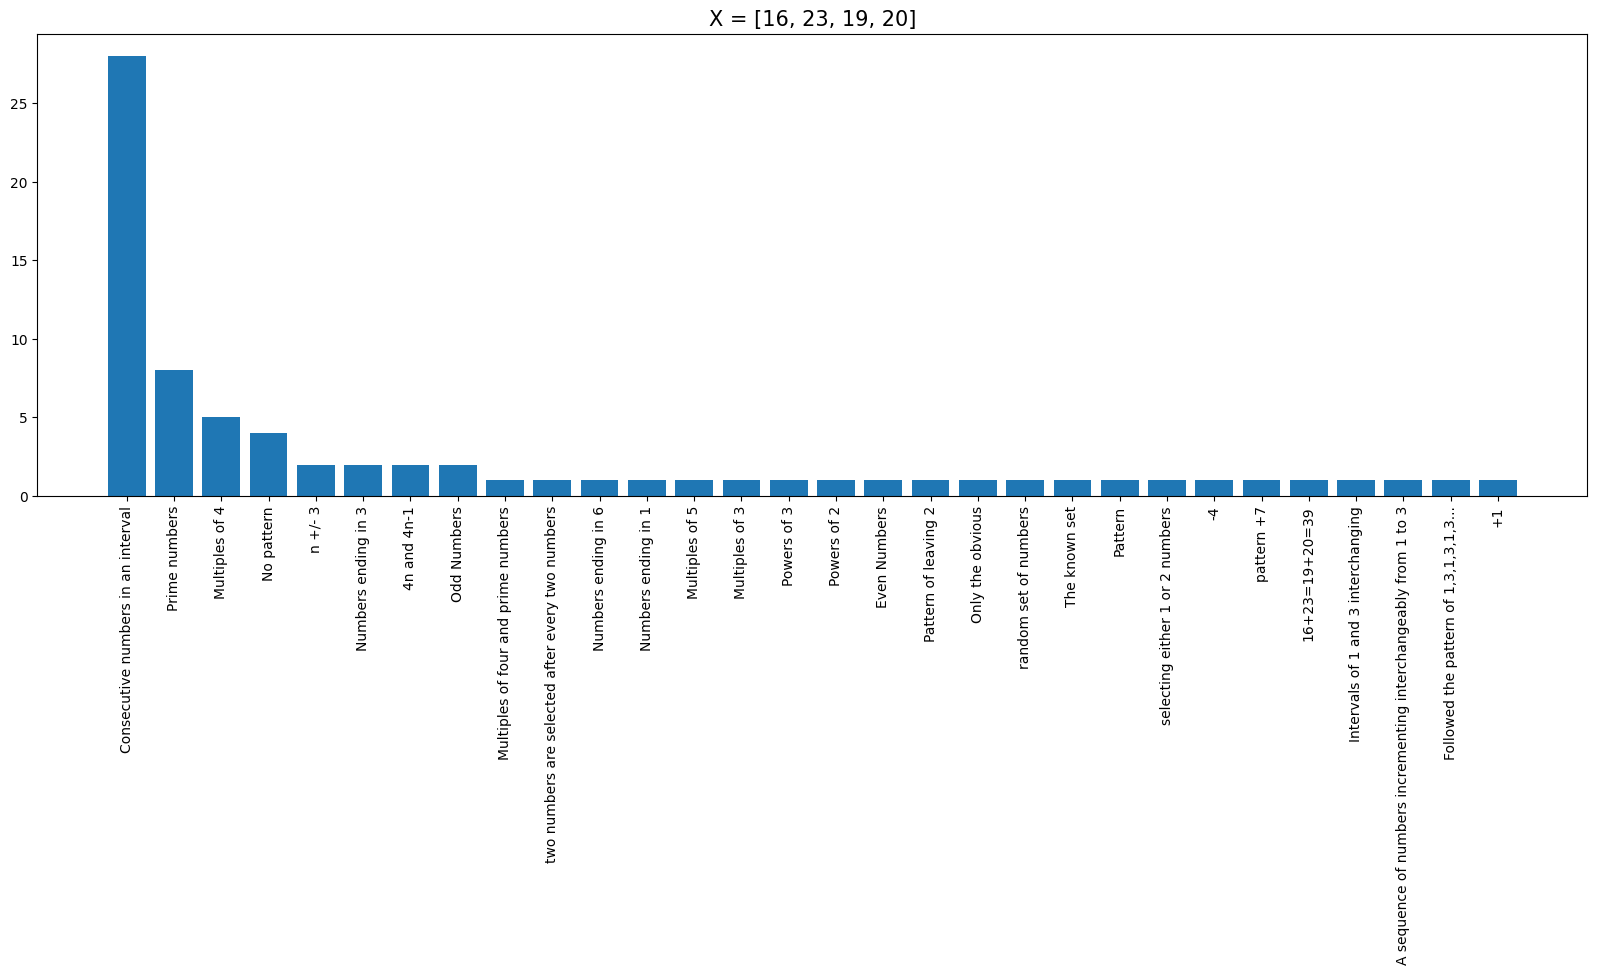

In [ ]:
p3 = priors_3.value_counts()
plt.figure(figsize = (20,6))
plt.bar(p3.index, p3)
plt.xticks(rotation = 90)
plt.title('X = [16, 23, 19, 20]', fontsize = 15)
plt.show()

# Modeling with Empirical Prior Probability
1. General Lambda + Empirical Prior Probability
2. General Lambda + Erlang Weighted Empirical Prior Probability
3. Pure Lambda + Empirical Prior Probability
4. Pure Lambda + Erlang Weighted Empirical Prior Probability



([<matplotlib.patches.Wedge at 0x7faf88420af0>,
 [Text(-0.6756339069630318, 0.8680546202641106, 'Mathematical rules'),
  Text(0.6756338256898898, -0.8680546835215186, 'Intervals')],
 [Text(-0.36852758561619914, 0.47348433832587844, '71.1%'),
  Text(0.3685275412853944, -0.4734843728299192, '28.9%')])

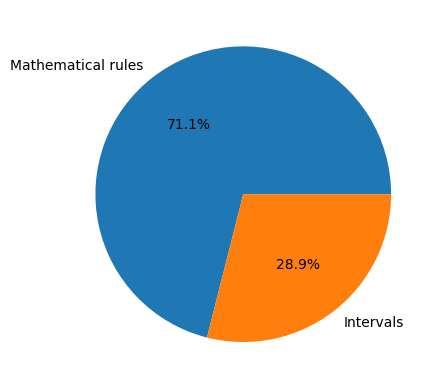

In [ ]:
math_vs_int = df.iloc[:, 11] + ', ' + df.iloc[:, 14] + ', ' + df.iloc[:, 17]
math_vs_int = math_vs_int.str.split(', ').explode().str.strip()
math_vs_int = math_vs_int.value_counts()
fig, ax = plt.subplots()
labels = 'Mathematical rules', 'Intervals'
ax.pie(math_vs_int, labels=labels, autopct='%1.1f%%')

In [ ]:
prior_hyp = pd.concat([priors_1, priors_2, priors_3]).value_counts()
prior_hyp

Powers of 2                                                       57
Consecutive numbers in an interval                                36
Even Numbers                                                      30
Multiples of 4                                                    20
Prime numbers                                                     10
Multiples of 8                                                     6
16                                                                 4
No pattern                                                         4
Multiples of 16                                                    4
Odd Numbers                                                        3
4                                                                  3
Only the obvious                                                   2
Numbers ending in 3                                                2
n +/- 3                                                            2
4n and 4n-1                       

In [ ]:
# Calculating Lambda two types of Lambda
interval_count = 54
total_counts = 79 + 54 # math + interval
mylambda = 1 - (interval_count / total_counts)
pure_interval_count = 8
pure_total_counts = 32 + 8 # math + interval
purelambda = 1 - (pure_interval_count / pure_total_counts)
print('General Lambda is:', mylambda)
print('Pure Lambda is:', purelambda)

General Lambda is: 0.5939849624060151
Pure Lambda is: 0.8


In [ ]:
# Calculating Math Priors
hypothesis_list = ['Even Numbers', 
                   'Odd Numbers',
                   'Powers of 2',
                   'Powers of 3',
                   'Multiples of 3',
                   'Multiples of 4',
                   'Multiples of 5',
                   'Numbers ending in 1',
                   'Numbers ending in 3',
                   'Numbers ending in 6',
                   'Prime numbers']
df_hypothesis_filtered = pd.DataFrame()
temp = prior_hyp[prior_hyp.index.isin(hypothesis_list)]
df_hypothesis_filtered['Hypothesis'] = temp.index
df_hypothesis_filtered['Total_Counts'] = temp.values
total_of_counts = df_hypothesis_filtered['Total_Counts'].sum()
df_hypothesis_filtered['Prior_Probabilities'] = df_hypothesis_filtered['Total_Counts'] /total_of_counts
df_hypothesis_filtered

,Hypothesis,Total_Counts,Prior_Probabilities
0,Powers of 2,57,0.448819
1,Even Numbers,30,0.236220
2,Multiples of 4,20,0.157480
3,Prime numbers,10,0.078740
4,Odd Numbers,3,0.023622
5,Numbers ending in 3,2,0.015748
6,Numbers ending in 6,1,0.007874
7,Numbers ending in 1,1,0.007874
8,Multiples of 5,1,0.007874
9,Multiples of 3,1,0.007874


In [ ]:
# Source: HW 3
# Generate a list of all mathematical hypotheses

# Even Numbers
def make_h_even():
    return list(range(2,x_max+1,2))

# Powers of 2
def make_h_powers_of_2(y = 2):
    h = []
    for x in range(1,x_max+1):
        if y**x <= x_max:
            h.append(y**x)
    return h
# def make_h_square():
#     h = []
#     for x in range(1,x_max+1):
#         if x**2 <= x_max:
#             h.append(x**2)
#     return h

# Multiples of 4
def make_h_mult_of_4(y = 4):
    h = []
    for x in range(1,x_max+1):
        if x*y <= x_max:
            h.append(x*y)
    return h

# Odd Numbers
def make_h_odd():
    return list(range(1,x_max+1,2))

# Prime numbers
def make_h_primes():
    return [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 
            53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

# Numbers ending in 3
def make_h_numbers_ending_in_3(y = 3):
    h = []
    for x in range(1,x_max+1):
        if str(x)[-1] == str(y):
            h.append(x)
    return h

# Powers of 3
def make_h_powers_of_3(y = 3):
    h = []
    for x in range(1,x_max+1):
        if y**x <= x_max:
            h.append(y**x)
    return h
# def make_h_cube():
#     h = []
#     for x in range(1,x_max+1):
#         if x**3 <= x_max:
#             h.append(x**3)
#     return h

# Multiples of 3
def make_h_mult_of_3(y = 3):
    h = []
    for x in range(1,x_max+1):
        if x*y <= x_max:
            h.append(x*y)
    return h

# Multiples of 5
def make_h_mult_of_5(y = 5):
    h = []
    for x in range(1,x_max+1):
        if x*y <= x_max:
            h.append(x*y)
    return h

# Numbers ending in 1
def make_h_numbers_ending_in_1(y = 1):
    h = []
    for x in range(1,x_max+1):
        if str(x)[-1] == str(y):
            h.append(x)
    return h

# Numbers ending in 6
def make_h_numbers_ending_in_6(y = 6):
    h = []
    for x in range(1,x_max+1):
        if str(x)[-1] == str(y):
            h.append(x)
    return h

x_max = 100
def generate_math_hypotheses(mylambda):
    h_set = [make_h_even(), make_h_powers_of_2(), make_h_mult_of_4(), make_h_odd(),
             make_h_primes(), make_h_numbers_ending_in_3(), make_h_powers_of_3(), make_h_mult_of_3(),
             make_h_mult_of_5(), make_h_numbers_ending_in_1(), make_h_numbers_ending_in_6()]
    n_hyp = len(h_set)
    hyp = np.array(df_hypothesis_filtered['Prior_Probabilities'])
    log_prior = np.log(mylambda * hyp) 
    ## weighted by lambda, assume uniform hypotheses: lambda * 1/number_of_hypotheses
    return h_set, log_prior

h_set_math, log_prior_math = generate_math_hypotheses(mylambda)
print("Four examples of math hypotheses:")
for i in range(4):
    print(h_set_math[i])
    print("")
print("Their prior log-probabilities:")
print(log_prior_math[0:4])

Four examples of math hypotheses:
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]

[2, 4, 8, 16, 32, 64]

[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]

Their prior log-probabilities:
[-1.32203709 -1.96389098 -2.36935609 -3.06250327]


In [ ]:
# Calculating Interval Priors
# Source: HW 3
## Generate a list of all interval hypotheses
def make_h_between_y_and_z(y,z):
    assert(y >= 1 and z <= x_max)
    return list(range(y,z+1))

def pdf_erlang(x,sigma=10.):
    return (x / sigma**2) * np.exp(-x/sigma)

def generate_interval_hypotheses(mylambda):
    h_set = []
    for y in range(1,x_max+1):
        for z in range(y,x_max+1):            
            h_set.append(make_h_between_y_and_z(y,z))
    nh = len(h_set)
    pv = np.ones(nh)
    for idx,h in enumerate(h_set): # prior based on length
        pv[idx] = pdf_erlang(len(h))
    pv = pv / np.sum(pv)
    pv = (1-mylambda) * pv
    log_prior = np.log(pv)
    return h_set, log_prior

def all_H_log_prior(mylambda):
    h_set_math, log_prior_math = generate_math_hypotheses(mylambda)
    h_set_int, log_prior_int = generate_interval_hypotheses(mylambda)
    
    all_H = h_set_math + h_set_int
    all_log_prior = np.append(log_prior_math, log_prior_int)
    
    assert(np.isclose(np.sum(np.exp(all_log_prior)), 1.0))
    
    return all_H, all_log_prior

In [ ]:
# Calculate Log Likelihood
def log_likelihood(X, h):
    log_llh = 0
    for data in X:
        if data in h:
            log_prob = np.log(1 / len(h))
            log_llh += log_prob
        else:
            return -np.inf
    return log_llh

In [ ]:
# Calculate Log Posterior
def log_posterior(X, all_H, all_log_prior):
    assert (len(all_H) == len(all_log_prior))
    
    num_hyp = len(all_log_prior)
    all_log_likelihood = np.zeros(num_hyp)
    
    for i in range(num_hyp):
        curr_h = all_H[i]
        curr_llh = log_likelihood(X, curr_h)
        
        all_log_likelihood[i] = curr_llh
        
    numerator = all_log_likelihood + all_log_prior 
    denominator = logsumexp(numerator)
    
    all_log_posterior = numerator - denominator
    return all_log_posterior

# predict test set
def bayesian_pred(Y, X, all_H, all_log_prior):
    all_log_posterior = log_posterior(X, all_H, all_log_prior)
    all_posterior = np.exp(all_log_posterior)
    
    num_C = len(Y)
    num_H = len(all_H)
    
    prob_membership = 0
    
    for h_idx in range(num_H):
        curr_h = all_H[h_idx]
        membership = np.zeros(num_C)
        
        for y_idx in range(num_C):
            curr_y = Y[y_idx]
            if curr_y in curr_h:
                membership[y_idx] = 1
        
        curr_posterior = all_posterior[h_idx]
        curr_prob = curr_posterior * membership
        
        prob_membership += curr_prob
    
    return prob_membership

### <h3> Method I: </h3>
<ul>
    <li>Lambda based on all three trials.</li>
    <li>Math hypotheses space only includes what we provided.</li>
    <li>Interval hypotheses space same as Tenenbaum/ HW.</li>
</ul>
</div>

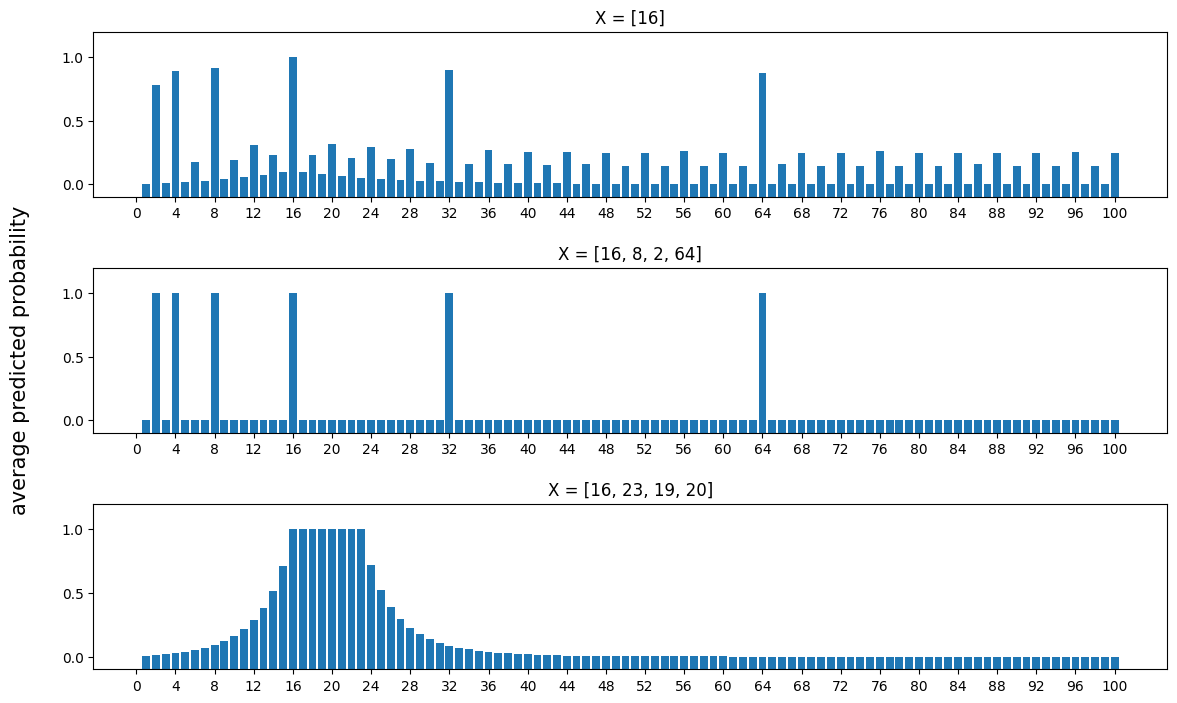

In [ ]:
# All numbers 1-100
x_eval = range(1,101)

all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]
# mylambda = 2./3
all_H, all_log_prior = all_H_log_prior(mylambda)

COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'average predicted probability', ha='center', va='center', rotation='vertical', fontsize = 15)

mybottom = -0.1
method_1 = np.zeros((3, 100))
for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_pred = bayesian_pred(x_eval, curr_X, all_H, all_log_prior)
    method_1[i] = curr_pred + 0.1
    
    ax = axes[i]
    ax.bar(x_eval, curr_pred - mybottom, bottom = mybottom)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((mybottom,1.2))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')

### <h3> Method II: </h3>
<ul>
    <li>Lambda based on all three trials.</li>
    <li>Math hypotheses weighted with erlang.</li>
    <li>Interval hypotheses space same as Tenenbaum/ HW.</li>
</ul>
</div>

In [ ]:
# Incorporate hypothesis size erlang value as a proxy of hypothesis complexity
def generate_math_hypotheses_with_erlang(mylambda):
    h_set = [make_h_even(), make_h_powers_of_2(), make_h_mult_of_4(), make_h_odd(),
             make_h_primes(), make_h_numbers_ending_in_3(), make_h_powers_of_3(), make_h_mult_of_3(),
             make_h_mult_of_5(), make_h_numbers_ending_in_1(), make_h_numbers_ending_in_6()]
    n_hyp = len(h_set)
    hyp = np.array(df_hypothesis_filtered['Prior_Probabilities'])
    erlang = np.array([pdf_erlang(len(h), sigma=14) for h in h_set]) * hyp
    norm_hyp = erlang/np.sum(erlang)
    log_prior = np.log(mylambda * norm_hyp)
    ## weighted by lambda, assume uniform hypotheses: lambda * 1/number_of_hypotheses
    return h_set, log_prior

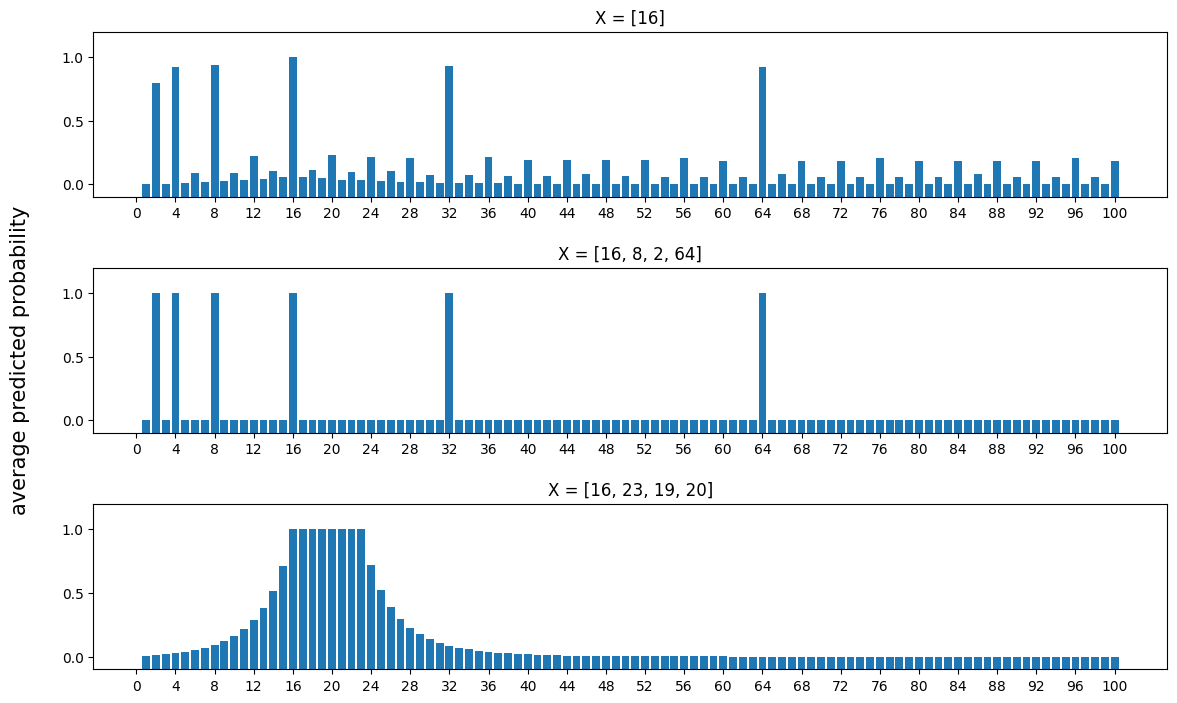

In [ ]:
def all_H_log_prior_erlang(mylambda):
    h_set_math, log_prior_math = generate_math_hypotheses_with_erlang(mylambda)
    h_set_int, log_prior_int = generate_interval_hypotheses(mylambda)
    
    all_H = h_set_math + h_set_int
    all_log_prior = np.append(log_prior_math, log_prior_int)
    
    assert(np.isclose(np.sum(np.exp(all_log_prior)), 1.0))
    
    return all_H, all_log_prior

x_eval = range(1,101)

all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]
# mylambda = 2./3
all_H, all_log_prior = all_H_log_prior_erlang(mylambda)

COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'average predicted probability', ha='center', va='center', rotation='vertical', fontsize = 15)

mybottom = -0.1
method_2 = np.zeros((3, 100))
for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_pred = bayesian_pred(x_eval, curr_X, all_H, all_log_prior)
    method_2[i] = curr_pred + 0.1
    
    ax = axes[i]
    ax.bar(x_eval, curr_pred - mybottom, bottom = mybottom)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((mybottom,1.2))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')

### <h3> Method III: </h3>
<ul>
    <li>Lambda based on first trials.</li>
    <li>Math hypotheses space only includes what we provided.</li>
    <li>Interval hypotheses space same as Tenenbaum/ HW.</li>
</ul>
</div>

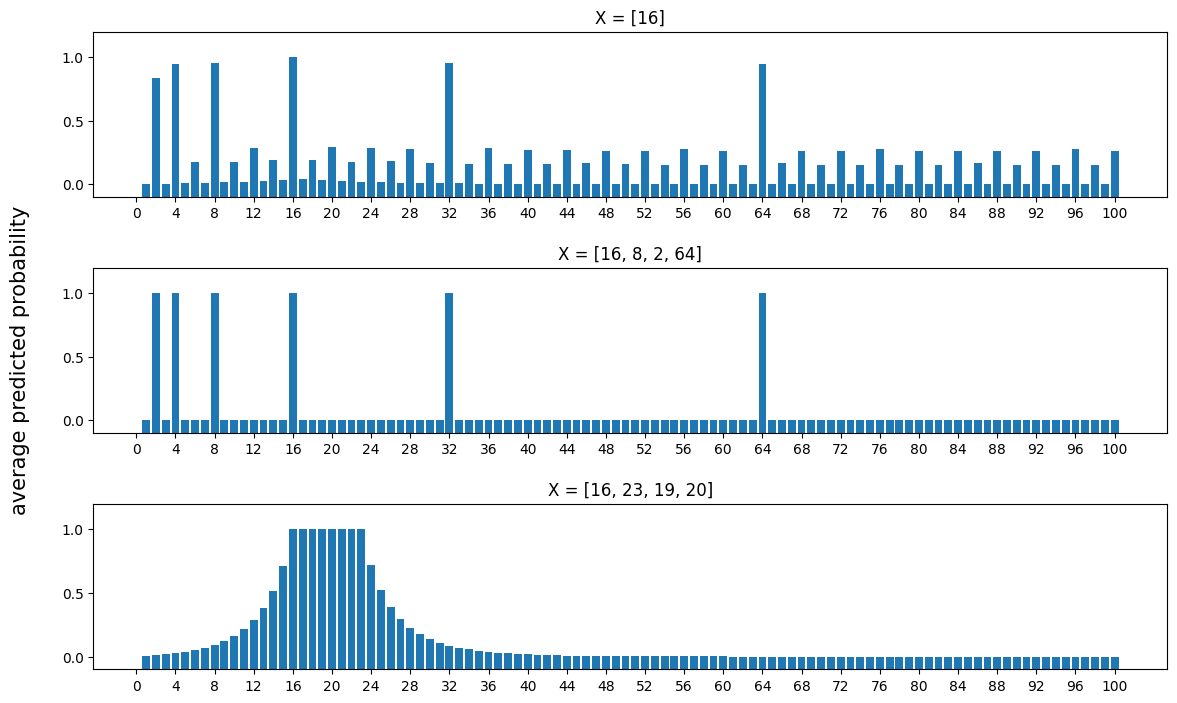

In [ ]:
# All numbers 1-100
x_eval = range(1,101)

all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]
all_H, all_log_prior = all_H_log_prior(purelambda)

COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'average predicted probability', ha='center', va='center', rotation='vertical', fontsize = 15)

mybottom = -0.1
method_3 = np.zeros((3, 100))
for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_pred = bayesian_pred(x_eval, curr_X, all_H, all_log_prior)
    method_3[i] = curr_pred + 0.1
    
    ax = axes[i]
    ax.bar(x_eval, curr_pred - mybottom, bottom = mybottom)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((mybottom,1.2))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')

### <h3> Method IV: </h3>
<ul>
    <li>Lambda based on first trials.</li>
    <li>Math hypotheses weighted with erlang.</li>
    <li>Interval hypotheses space same as Tenenbaum/ HW.</li>
</ul>
</div>

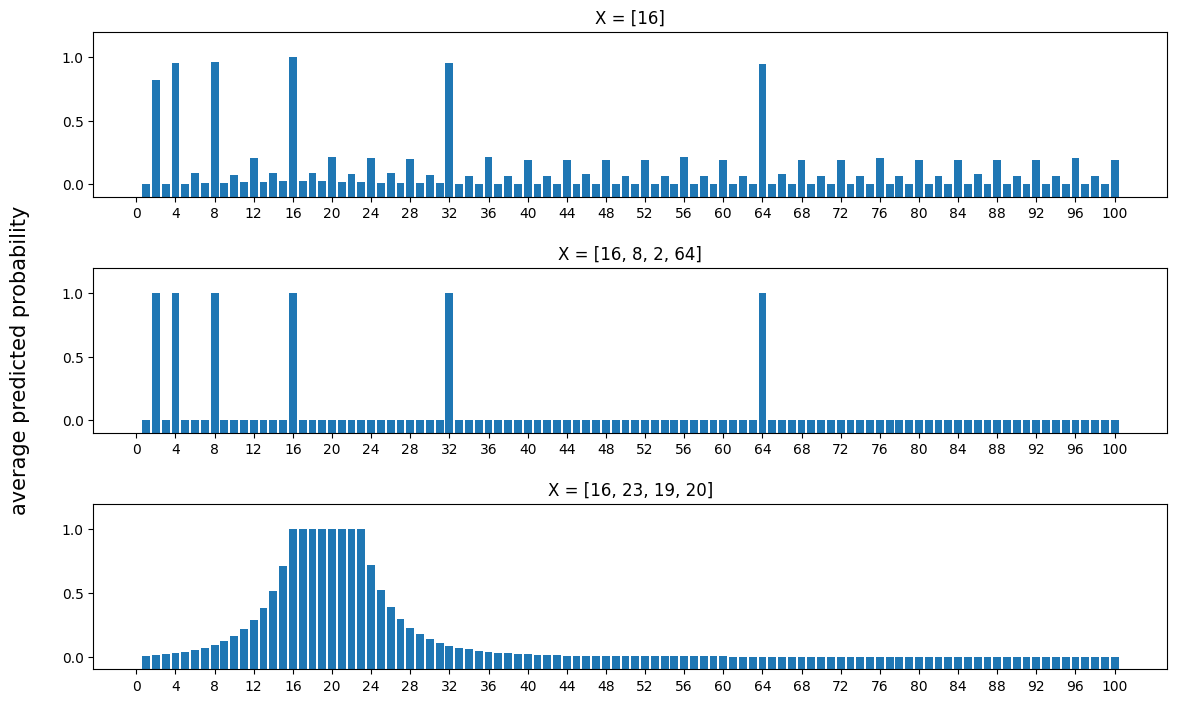

In [ ]:
x_eval = range(1,101)

all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]
all_H, all_log_prior = all_H_log_prior_erlang(purelambda)

COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'average predicted probability', ha='center', va='center', rotation='vertical', fontsize = 15)

mybottom = -0.1
method_4 = np.zeros((3, 100))
for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_pred = bayesian_pred(x_eval, curr_X, all_H, all_log_prior)
    method_4[i] = curr_pred + 0.1
    
    ax = axes[i]
    ax.bar(x_eval, curr_pred - mybottom, bottom = mybottom)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((mybottom,1.2))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')

### Homework results

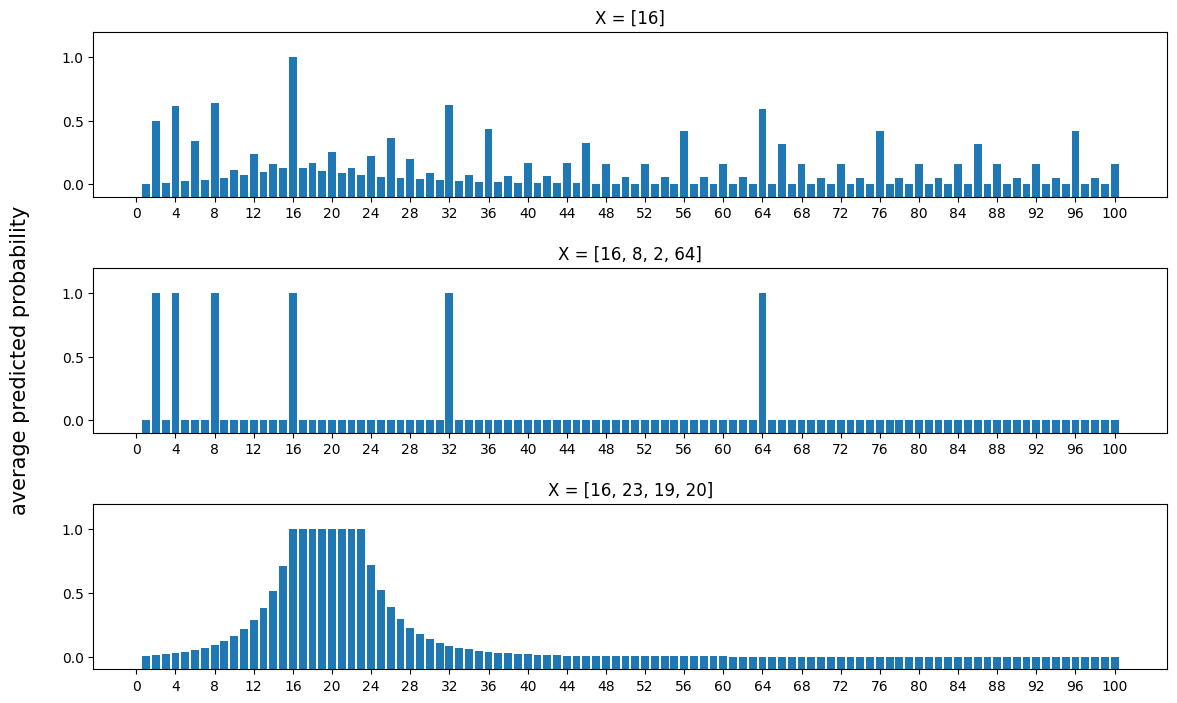

In [ ]:
mylambda = 2./3
def generate_math_hypotheses_hw(mylambda):
    h_set = [make_h_even(), make_h_powers_of_2(), make_h_mult_of_4(), make_h_odd(),
             make_h_primes(), make_h_numbers_ending_in_3(), make_h_powers_of_3(), make_h_mult_of_3(),
             make_h_mult_of_5(), make_h_numbers_ending_in_1(), make_h_numbers_ending_in_6()]
    n_hyp = len(h_set)
    log_prior = np.log(mylambda * np.ones(n_hyp) / float(n_hyp))
    return h_set, log_prior

def all_H_log_prior_hw(mylambda):
    h_set_math, log_prior_math = generate_math_hypotheses_hw(mylambda)
    h_set_int, log_prior_int = generate_interval_hypotheses(mylambda)
    
    all_H = h_set_math + h_set_int
    all_log_prior = np.append(log_prior_math, log_prior_int)
    
    assert(np.isclose(np.sum(np.exp(all_log_prior)), 1.0))
    
    return all_H, all_log_prior
  
# All numbers 1-100
x_eval = range(1,101)

all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]
# mylambda = 2./3
all_H, all_log_prior = all_H_log_prior_hw(mylambda)

COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'average predicted probability', ha='center', va='center', rotation='vertical', fontsize = 15)

mybottom = -0.1
hw = np.zeros((3, 100))
for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_pred = bayesian_pred(x_eval, curr_X, all_H, all_log_prior)
    hw[i] = curr_pred + 0.1
    
    ax = axes[i]
    ax.bar(x_eval, curr_pred - mybottom, bottom = mybottom)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((mybottom,1.2))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')

### Uniform priors and erlang complexity results

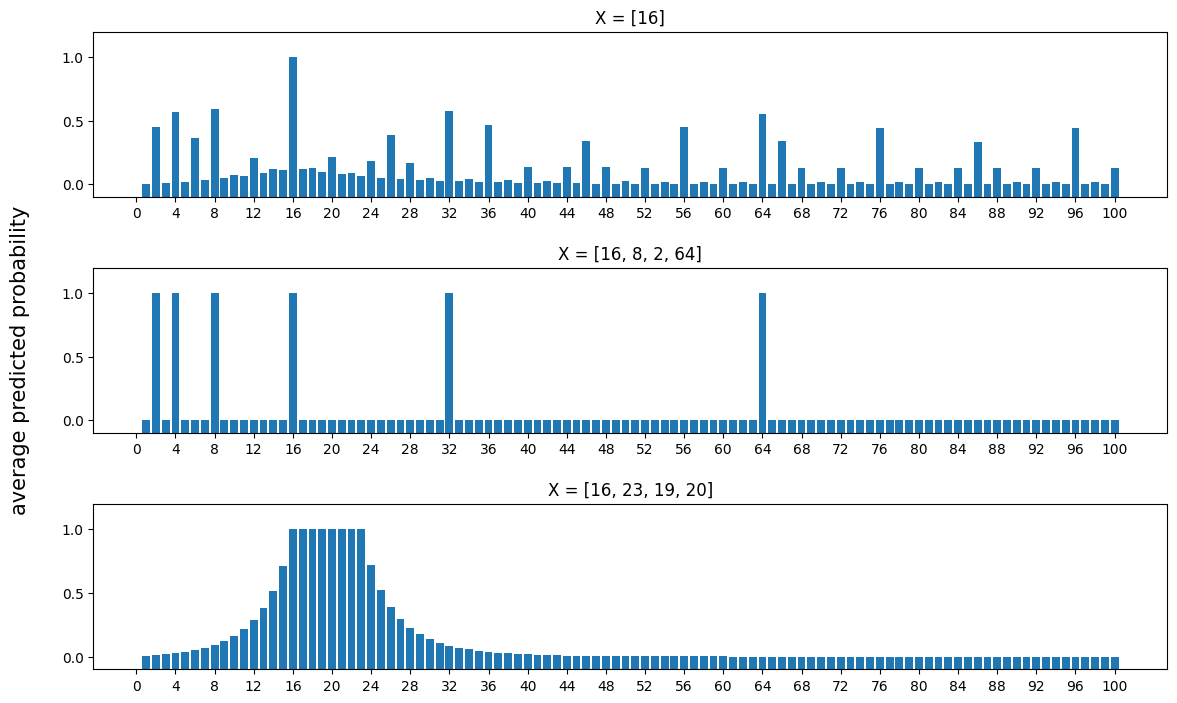

In [ ]:
# Incorporate hypothesis size erlang value as a proxy of hypothesis complexity
def generate_math_hypotheses_uni_with_erlang(mylambda):
    h_set = [make_h_even(), make_h_powers_of_2(), make_h_mult_of_4(), make_h_odd(),
             make_h_primes(), make_h_numbers_ending_in_3(), make_h_powers_of_3(), make_h_mult_of_3(),
             make_h_mult_of_5(), make_h_numbers_ending_in_1(), make_h_numbers_ending_in_6()]
    n_hyp = len(h_set)
    erlang = np.array([pdf_erlang(len(h), sigma=14) for h in h_set]) * np.ones(n_hyp)
    norm_hyp = erlang/np.sum(erlang) 
    log_prior = np.log(mylambda * norm_hyp)
    ## weighted by lambda, assume uniform hypotheses: lambda * 1/number_of_hypotheses
    return h_set, log_prior

def all_H_log_prior_uni_erlang(mylambda):
    h_set_math, log_prior_math = generate_math_hypotheses_uni_with_erlang(mylambda)
    h_set_int, log_prior_int = generate_interval_hypotheses(mylambda)
    
    all_H = h_set_math + h_set_int
    all_log_prior = np.append(log_prior_math, log_prior_int)
    
    assert(np.isclose(np.sum(np.exp(all_log_prior)), 1.0))
    
    return all_H, all_log_prior
  
# All numbers 1-100
x_eval = range(1,101)

all_X = [[16], [16, 8, 2, 64], [16, 23, 19, 20]]

all_H, all_log_prior = all_H_log_prior_uni_erlang(mylambda)

COL_NUM = 1
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,7.5)) 
fig.tight_layout(pad = 3.0)
fig.text(0, 0.5, 'average predicted probability', ha='center', va='center', rotation='vertical', fontsize = 15)

mybottom = -0.1
uni_erlang = np.zeros((3, 100))
for i in range(ROW_NUM):
    curr_X = all_X[i]
    curr_pred = bayesian_pred(x_eval, curr_X, all_H, all_log_prior)
    uni_erlang[i] = curr_pred + 0.1
    
    ax = axes[i]
    ax.bar(x_eval, curr_pred - mybottom, bottom = mybottom)
    ax.set_xticks(np.arange(0, x_max + 1, step = 4))
    ax.set_ylim((mybottom,1.2))
    
    label = 'X = ' + str(curr_X)
    ax.set_title(label)

#fig.supylabel('average predicted probability')

# Evaluate Distribution Appoximation
Compute KL Divergence of four methods and human distribution

In [ ]:
def eval_kl(P, Q):
  divergence = kl_div(P, Q)
  total_div  = np.sum(divergence)
  return total_div

print(f'KL(method_1 || human): {eval_kl(method_1, human)}')
print(f'KL(method_2 || human): {eval_kl(method_2, human)}')
print(f'KL(method_3 || human): {eval_kl(method_3, human)}')
print(f'KL(method_4 || human): {eval_kl(method_4, human)}')
print(f'KL(hw || human): {eval_kl(hw, human)}')
print(f'KL(uniform_erlang || human): {eval_kl(uni_erlang, human)}')

KL(method_1 || human): 8.648003262231626
KL(method_2 || human): 8.0953101546971
KL(method_3 || human): 8.990755588761001
KL(method_4 || human): 8.257687121176899
KL(hw || human): 8.564317980640114
KL(uniform_erlang || human): 8.806138545258817
